# Маркетинговый анализ приложения Procrastinate Pro+

**Цель исследования -** выявить причины несения компанией убытков в течение последних месяцев и составление рекомендаций по исправлению ситуации. <br>
    
**Ход исследования:**
1. Загрузка и предобработка данных: загрузка датафрейма и первичное знакомство с его содержанием, изменения типов данных, поиск пропусков и дубликатов.
2. Добавление функций для создания профилей пользователей, расчета показателей и построения графиков LTV, ROI, удержания и конверсии.
3. Исследовательский анализ данных: составление профилей пользователей, анализ ключевых характеристик клиентов и платящих пользователей, таких как регион проживания, устройство и рекламные источники привлечения.
4. Маркетинг: расчет общей суммы расходов на маркетинг, анализ распределения расходов по разным каналам привлечения пользователей и динамики его изменения во времени.
5. Оценка окупаемости рекламы: выявление возможных причин возникновления проблем с окупаемостью и формирование промежуточных рекомендаций для рекламного отдела.
6. Итоговые выводы и рекомендации.

### Загрузка и предобработка данных

In [ ]:
#импортирую библиотеки
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#загружаю датасеты
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [ ]:
#изучаю датасет, проверяю наличие пропусков в данных 
display(visits.head(10))
display(visits.info())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

In [ ]:
#меняю название столбцов 
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})

In [ ]:
#привожу к нижнему регистру данные типа object
visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
display(visits.head(10))

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,united states,iphone,rocketsuperads,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,united states,android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,united states,iphone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,united states,iphone,rocketsuperads,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,united states,mac,tiptop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [ ]:
#перевожу столбцы с датой и временем в тип данных datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

In [ ]:
#проверяю датасет на наличие явных дубликатов
display(visits.duplicated().sum())

0

In [ ]:
#изучаю датасет, проверяю наличие пропусков в данных
display(orders.head(10))
display(orders.info())

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

In [ ]:
#меняю название столбцов 
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

In [ ]:
#перевожу столбец с датой и временем в тип данных datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

In [ ]:
#проверяю датасет на наличие явных дубликатов
display(orders.duplicated().sum())

0

In [ ]:
#изучаю датасет, проверяю наличие пропусков в данных
display(costs.head(10))
display(costs.info())

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [ ]:
#привожу названия столбцов к нижнему регистру
costs.columns = costs.columns.str.lower()

In [ ]:
#привожу к нижнему регистру данные типа object
costs['channel'] = costs['channel'].str.lower()
display(costs.head(10))

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
5,2019-05-06,faceboom,118.8
6,2019-05-07,faceboom,101.2
7,2019-05-08,faceboom,100.1
8,2019-05-09,faceboom,93.5
9,2019-05-10,faceboom,104.5


In [ ]:
#перевожу столбец с датой и временем в тип данных datetime
costs['dt'] = pd.to_datetime(costs['dt'])
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

In [ ]:
#проверяю датасет на наличие явных дубликатов
display(costs.duplicated().sum())

0

Ни в одном из датасетов нет пропусков или явных дубликатов. Столбцы с датой и временем имели тип данных object, он был заменен на datetime. Также были приведены к нижнему регистру данные типа object и изменены названия столбцов для удобства дальнейшей работы с датасетами.

### Добавление функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Для обработки и визуализации данных необходимо задать ряд функций.

1. Функция для создания профилей пользователей:

In [ ]:
def get_profiles(visits, orders, costs):
    
    #определяем параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() 
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    #добавляем отдельную категорию платящих пользователей
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())
    
    
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    costs['dt'] = pd.to_datetime(costs['dt']).dt.date
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # считаем стоимость привлечения пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
    
    # добавляем стоимость привлечения пользователей в профиль
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # по умолчанию стоимость привлечения органических пользователей будет равняться нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
   
    
    return profiles

2. Функция для подсчёта Retention Rate:

In [ ]:
def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем признак платящего пользователя в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

3. Функция для подсчёта конверсии:

In [ ]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

4. Функция для подсчёта LTV и ROI:

In [ ]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

5. Функция для сглаживания данных:

In [ ]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

6. Функция для построения графика Retention Rate:

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

7. Функция для построения графика конверсии:

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

8. Функция для визуализации LTV и ROI:

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

Для начала составим профили пользователей и определим минимальную и максимальную дату их привлечения. 

In [ ]:
#получаю профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [ ]:
#определяю минимальную и максимальную дату привлечения пользователей
min_acq_date = profiles['dt'].min()
max_acq_date = profiles['dt'].max()
display(min_acq_date)
display(max_acq_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей - 01.05.2019, максимальная - 27.10.2019.

Теперь посмотрим на распределение пользователей по странам, особое внимание уделив доле платящих клиентов из каждой страны.

In [ ]:
display(
    profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'}).round(3)
    .sort_values(by='payer', ascending=False)
)

,user_id,payer
region,,
united states,100002,0.069
germany,14981,0.041
uk,17575,0.040
france,17450,0.038


Наибольшее количество пользователей из США, и именно в США наивысшая доля платящих клиентов - около 7% пользователей пользуются платными услугами приложения.
Приблизительно одинаковые показатели демонстрируют Великобритания и Франция: 17575 пользователей, из которых 4% являются платящими клиентами, в Великобритании и 17450 пользователей с 3.8% платящих пользователей во Франции. 
В Германии пользователей приложения меньше всего - 14981 человек, однако доля платящих клиентов даже чуть выше, чем в двух других европейских странах - 4.1%.  
В целом, можно сделать вывод о том, что показатели европейских пользователей довольно схожи между собой и отличаются от американских.

Перейдем к устройствам, которые используют пользователи приложения.

In [ ]:
display(
    profiles.groupby('device')
    .agg({'user_id': 'nunique','payer': 'mean'}).round(3)
    .sort_values(by='user_id', ascending=False)
    .reset_index()
)

,device,user_id,payer
0,iphone,54479,0.062
1,android,35032,0.059
2,pc,30455,0.050
3,mac,30042,0.064


Распределение пользователей по устройствам похоже на распределение по регионам: есть очевидный лидер, в данном случае это iPhone (54.5 тыс. пользователей), и далее следуют три сопоставимые по количеству клиентов платформы - Android (35 тыс.), PC (30.5 тыс.) и Mac (30 тыc.). При этом наиболее прибыльными клиентами являются пользователи с устройствами Apple, так как доля платящих клиентов, пользующихся айфонами (6.2%) и компьютерами Mac (6.4%), выше, чем у владельцев андроидов (5.9%) и PC (5%). 

Теперь посмотрим на каналы привлечения клиентов.

In [ ]:
display(
    profiles.groupby('channel')
    .agg({'user_id': 'nunique','payer': 'mean'}).round(3)
    .sort_values(by='payer', ascending=False)
    .reset_index()
)

,channel,user_id,payer
0,faceboom,29144,0.122
1,adnonsense,3880,0.113
2,lambdamediaads,2149,0.105
3,tiptop,19561,0.096
4,rocketsuperads,4448,0.079
5,wahoonetbanner,8553,0.053
6,yrabbit,4312,0.038
7,mediatornado,4364,0.036
8,leapbob,8553,0.031
9,opplecreativemedia,8605,0.027


Наибольшее количество пользователей было привлечено бесплатно, благодаря органическому трафику из поисковых систем. Показательно, что именно эта категория клиентов приносит наименьшую прибыль, так как лишь 2% органических пользователей воспользовалось платными услугами приложения. Лидерами по количеству привлеченных пользователей и высокой конверсии из неплатящих пользователей в платящих являются FaceBoom и TipTop. Антилидерами можно назвать LeapBob и OppleCreativeMedia, так как при довольно большом количестве привлеченных клиентов (8.5 тыс), именно у этих пользователей наименее низкий показатель конверсии в покупателей. Стоит также отметить каналы AdNonSense и lambdaMediaAds: несмотря на то, что количество пользователей привлеченных через эти каналы минимальное по сравнению с остальными, по показателю конверсии пользователей в покупателей эти каналы опережает только FaceBoom.

### Маркетинг

Для начала посчитаем общую сумму расходов на маркетинг.

In [ ]:
display(f"Общая сумма расходов на маркетинг: {costs['costs'].sum().round(0)}$") 

'Общая сумма расходов на маркетинг: 105497.0$'

Теперь посмотрим на распределение трат по рекламным источникам.

In [ ]:
costs_grouped = costs.groupby('channel').agg({'costs': 'sum'}).round(1)\
                                        .sort_values(by='costs', ascending=False).reset_index() 

def percent(i):
    return "{0:.1%}".format(i)

costs_grouped['costs_share'] = (costs_grouped['costs'] / 105497).apply(percent)
display(costs_grouped)

,channel,costs,costs_share
0,tiptop,54751.3,51.9%
1,faceboom,32445.6,30.8%
2,wahoonetbanner,5151.0,4.9%
3,adnonsense,3911.2,3.7%
4,opplecreativemedia,2151.2,2.0%
5,rocketsuperads,1833.0,1.7%
6,leapbob,1797.6,1.7%
7,lambdamediaads,1557.6,1.5%
8,mediatornado,954.5,0.9%
9,yrabbit,944.2,0.9%


Однозначным лидером по сумме привлеченных инвестиций является TipTop, доля затрат на который составила более половины средств от общей суммы. Далее следует FaceBoom, в который было вложено 30.8% средств рекламного бюджета. Во все остальные рекламные каналы было вложено существенно меньше денег, третий по размерам вложения денежных средств рекламный канал WahooNetBanner получил лишь 4.9% средств рекламного бюджета. Меньше всего денег было вложено в MediaTornado и YRabbit - менее 1% от общей суммы рекламных инвестиций.

Посмотрим на динамику изменения расходов во времени по каждому рекламному источнику.

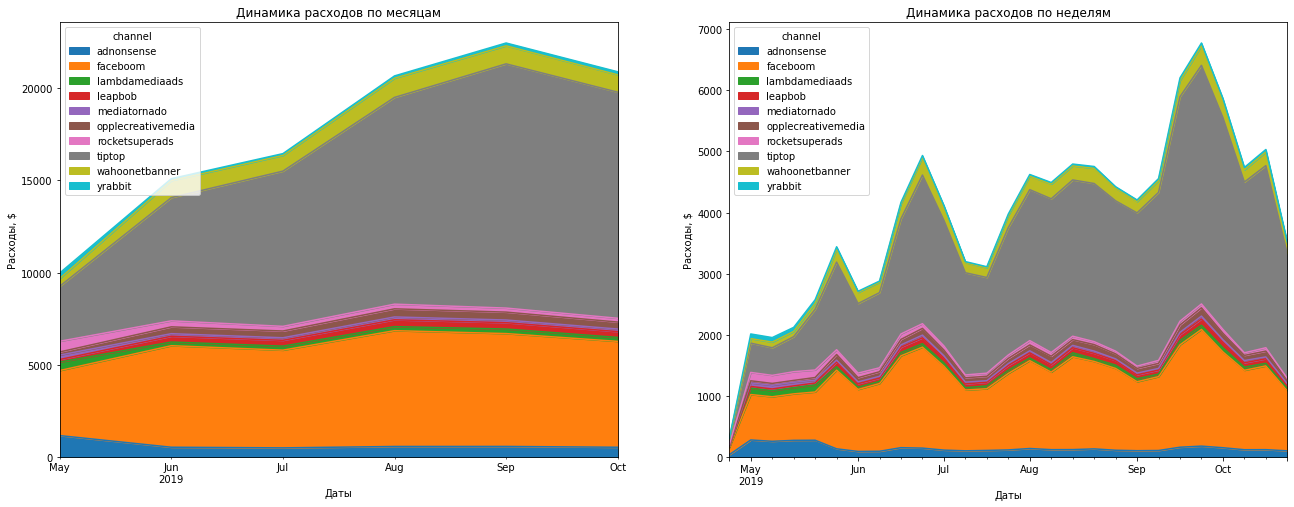

In [ ]:
columns = ['Динамика расходов по месяцам', 'Динамика расходов по неделям']

costs['Динамика расходов по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['Динамика расходов по неделям'] = costs['dt'].astype('datetime64[W]')

plt.subplots(figsize = (22, 8))
for a, c in enumerate(columns):
    costs.pivot_table(index = c, 
                      columns = 'channel', 
                      values = 'costs', 
                      aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, a + 1))
    plt.title(c)
    plt.xlabel('Даты')
    plt.ylabel('Расходы, $')
    
plt.show()

На графике с динамикой расходов по месяцам видно, что рекламные расходы планомерно росли до начала октября с небольшим спадом показателей в июле, с начала же октября заметно стремительное падение расходов, отчетливо видное на графике динамики расходов по неделям. Однозначными лидерами по вложению денежных средств являются TipTop и FaceBoom, и если вложения в FaceBoom на протяжении всего анализируемого периода были примерно одинаковыми, то вложения в TipTop постепенно росли до октября. Пиковым периодом по вложению денежных средств в рекламные каналы стала середина сентября, дальше фиксируется стремительное падение расходов.

Теперь рассчитаем, сколько в среднем стоило привлечение одного пользователя из каждого рекламного источника.

In [ ]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'}).round(3)
    .rename(columns={'acquisition_cost': 'cac'})
    .query('channel != "organic"') #убираю органически привлеченных пользователей, т.к. на их привлечение затрат нет
    .reset_index()
    .sort_values('cac', ascending = False)
)

cac['avg_cac'] = cac['cac'].mean().round(3)
cac['cac_difference'] =  cac['avg_cac'] - cac['cac']
display(cac)

,channel,cac,avg_cac,cac_difference
7,tiptop,2.799,0.756,-2.043
1,faceboom,1.113,0.756,-0.357
0,adnonsense,1.008,0.756,-0.252
2,lambdamediaads,0.725,0.756,0.031
8,wahoonetbanner,0.602,0.756,0.154
6,rocketsuperads,0.412,0.756,0.344
5,opplecreativemedia,0.250,0.756,0.506
4,mediatornado,0.219,0.756,0.537
9,yrabbit,0.219,0.756,0.537
3,leapbob,0.210,0.756,0.546


Самая высокая стоимость привлечения пользователей у канала TipTop, она почти в 3 раза выше, чем у следующего по показателям канала. Далее в среднем примерно одинаково стоит привлечение одного пользователя с помощью FaceBoom и AdNonSense. Именно у трех перечисленных рекламных каналов показатель CAC выше, чем средний CAC по всем каналам.
Дешевле всего обходится привлечение клиентов из каналов YRabbit, MediaTornado и LeapBob.

### Оценка окупаемости рекламы

Так как в данном разделе мы анализируем окупаемость рекламы, необходимо удалить органический канал, так как затраты на привлечение органических пользователей отсутствуют, а их наличие на графиках может исказить результаты анализа.

In [ ]:
profiles = profiles.query('channel != "organic"')

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Горизонт и момент анализа указаны в задании, добавляем их в код.

In [ ]:
#задаю момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14 

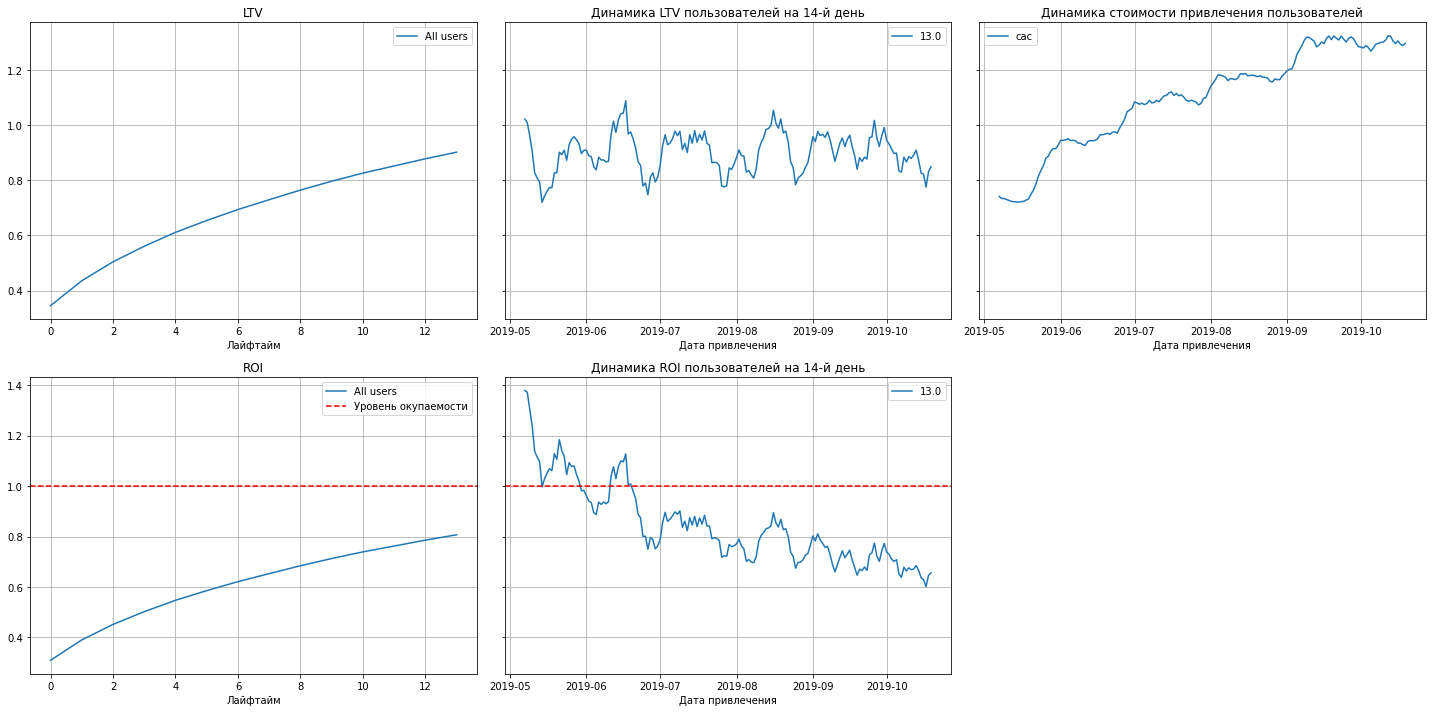

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Исходя из информации, представленной на графиках, рекламные вложения, которые компания планомерно увеличивала в течение анализируемого периода, не окупаются, так как показатель ROI к концу двухнедельного периода чуть выше отметки 0.6, то есть 60%. Динамика ROI была отрицательной с самого начала исследуемого периода, начиная со второй половины июня ROI стабильно ниже уровня окупаемости. При этом CAC постоянно увеличивается, то есть стоимость привлечения одного клиента растет с увеличением рекламного бюджета. Показатели LTV достаточно стабильные, из чего можно сделать вывод о том, что качество привлеченных клиентов не ухудшается. 

Теперь изучим графики конверсии и удержания.

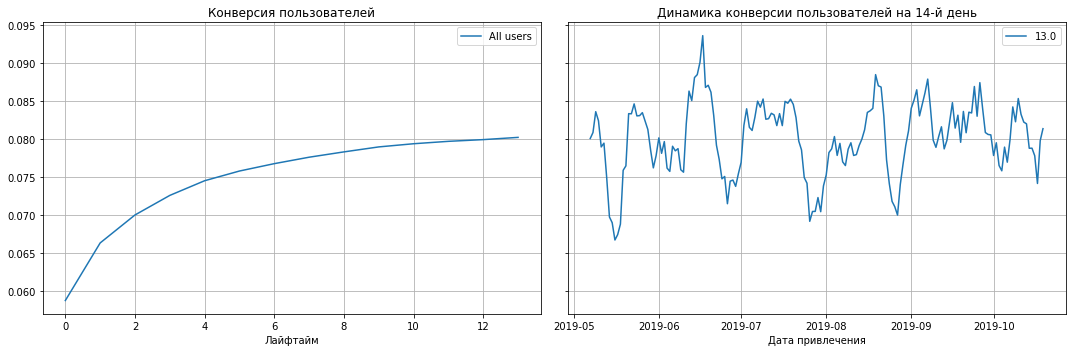

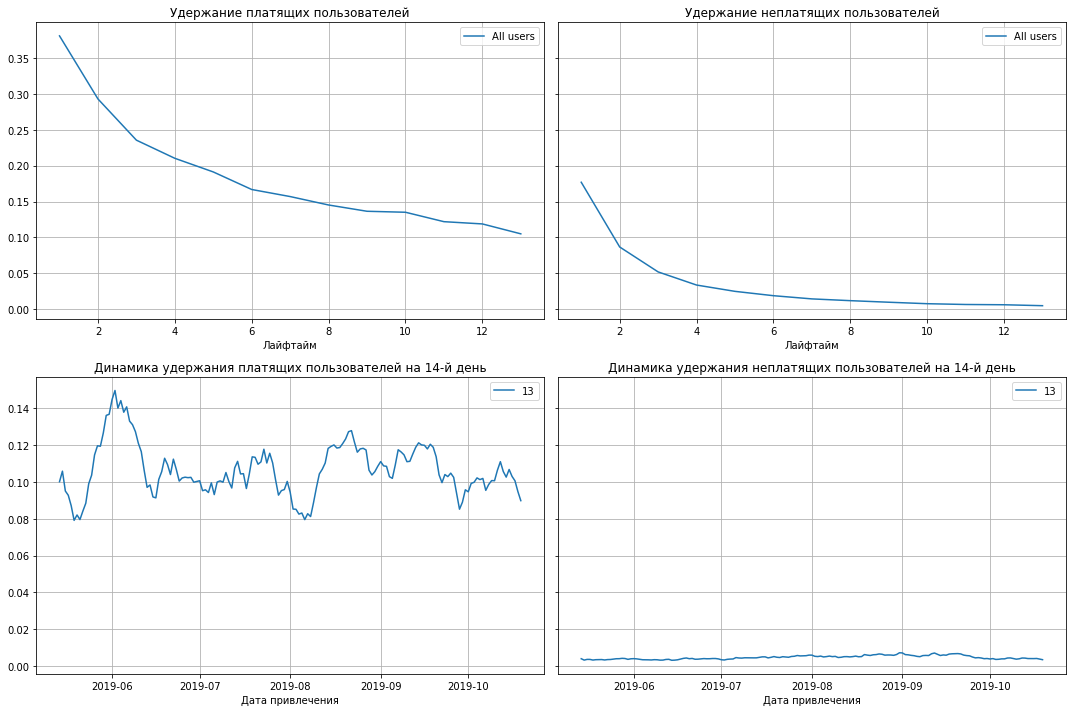

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

График конверсии пользователей немного отличается от того, каким он должен быть в идеале: начинаясь на уровне нуля, он должен бесконечно стремиться к единице, а в нашем случае на уровне 8-10 лайфтаймов заметно ощутимое замедление и практически полная остановка роста анализируемого показателя. Удержание платящих пользователей ожидаемо выше, чем удержание неплатящих пользователей, при этом динамика удержания пользователей на 14-й день довольно стабильная. 

Рассмотрев общие графики конверсии и удержания, перейдем к анализу аналогичных графиков в разбивке по устройствам, регионам и рекламным каналам.

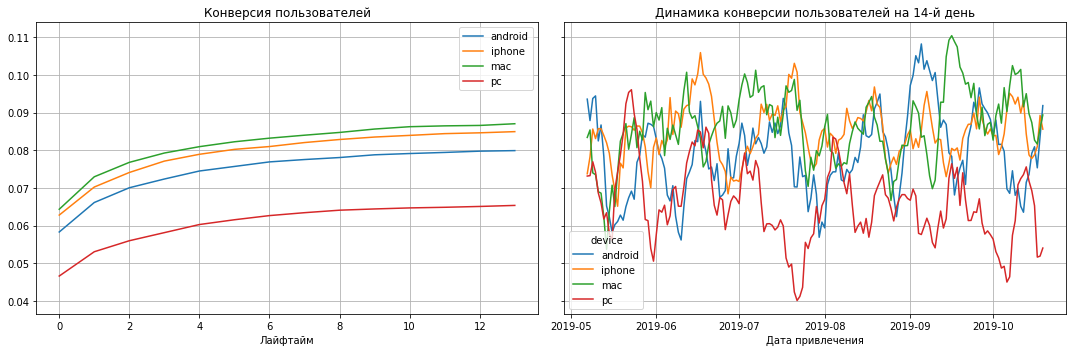

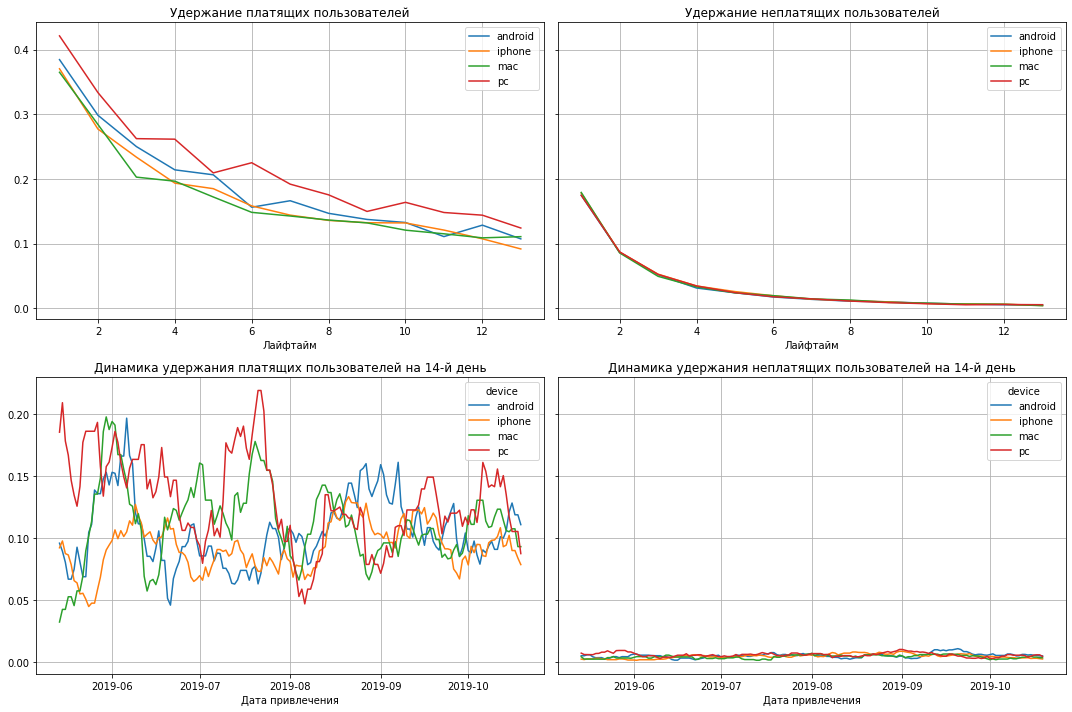

In [ ]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на то, что у PC самые низкие показатели конверсии в платящих пользователей, при сравнении их удержания в разбивке по устройствам именно PC стабильно лидирует. Также принимая во внимание все остальные расчеты, можно сделать вывод, что проблемы с окупаемостью рекламной кампании навряд ли вызваны каким-либо из типов устройств, используемых пользователями приложения. 

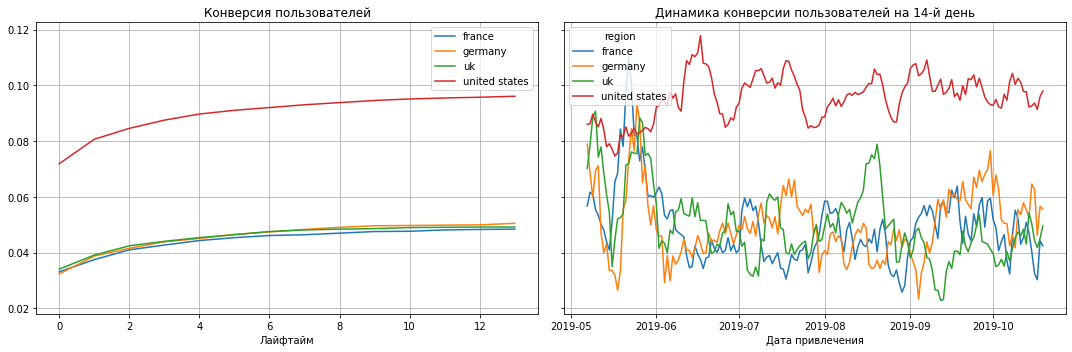

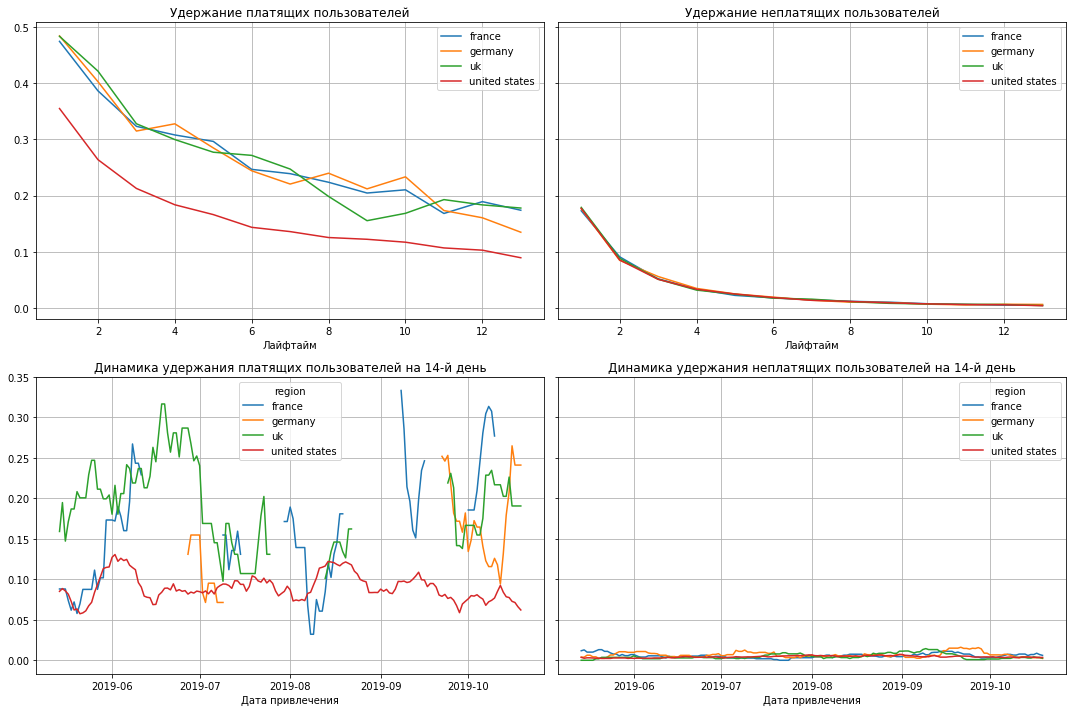

In [ ]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

График конверсии подтверждает полученные ранее результаты, согласно которым именно американские пользователи чаще пользуются платными услугами приложения. Тем не менее, на графике удержания платящих пользователей видно, что платящие пользователи из США очень плохо удерживаются в приложении, что очевидно приводит к проблемам с окупаемостью рекламных расходов, тем более, что именно у американских пользователей самые высокие показатели CAC. Европейские страны, в свою очередь, показывают схожие результаты и по конверсии, и по удержанию, лидеров и антилидеров среди них фактически нет.

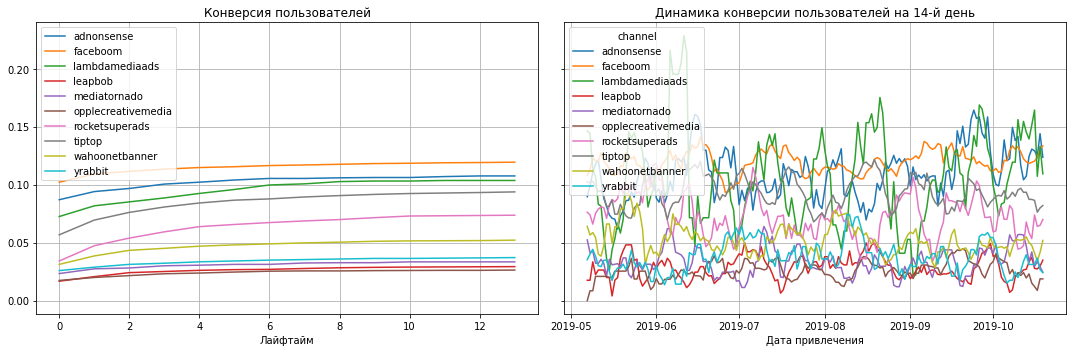

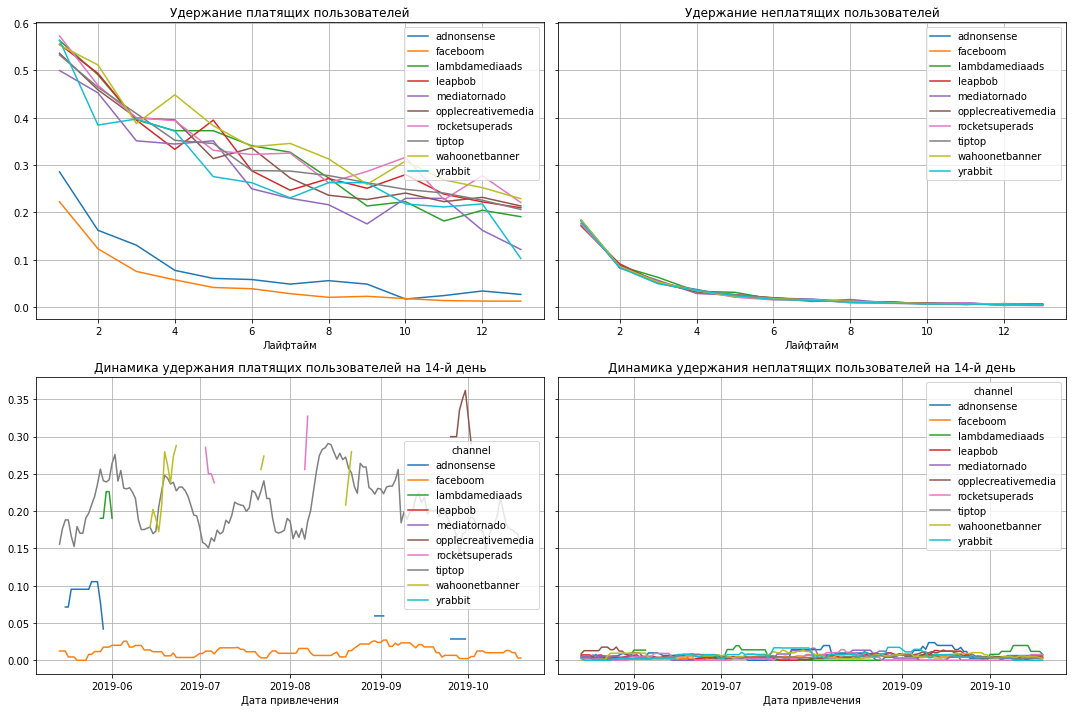

In [ ]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Как и в случае с разбивкой по регионам, при разделении пользователей по каналам привлечения лидирующие каналы по конверсии в покупателей оказываются антилидерами по удержанию платящих пользователей, в данном случае речь идет о каналах AdNonSense и FaceBoom. Рекламный канал TipTop, являющийся абсолютным лидером по сумме привлеченных рекламных средств, демонстрирует довольно средние показатели конверсии и удержания, не сильно отличающиеся от других каналов, в которые было вложенно в десятки раз меньше денег из рекламного бюджета. 

Проанализируем окупаемость рекламы с разбивкой по устройствам.

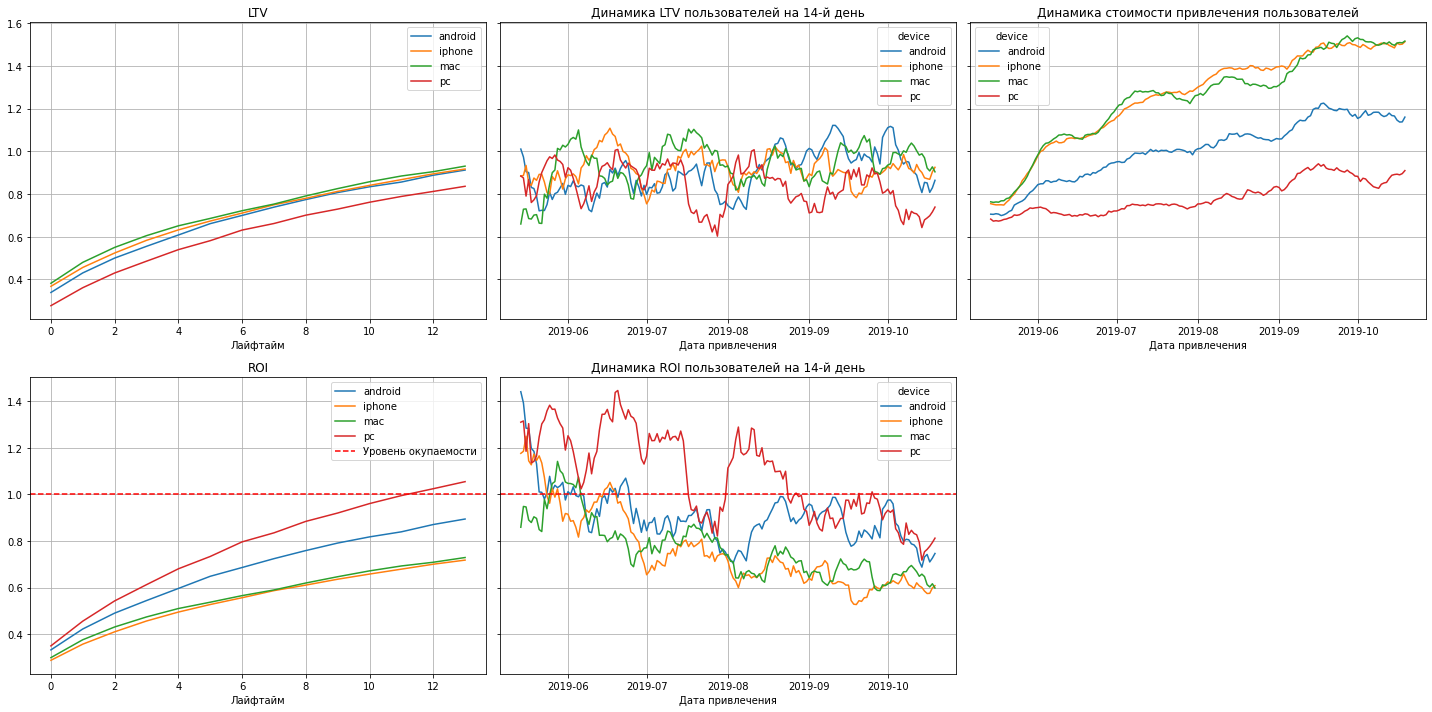

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В разбивке по устройствам видно, что реклама фактически не окупается для 3 из 4 платформ. ROI выше уровня окупаемости только у PC, при этом происходит это вероятно за счет того, что CAC именно у PC не рос такими стремительными темпами, как у других платформ. Примечательно, что именно у пользователей PC LTV ниже, чем у остальных платформ. Android хоть и не окупается, однако его показатели выше, чем у устройств Apple, что вероятно также может быть обусловлено отсутствием стремительного роста затрат на привлечение одного клиента. 

Теперь проанализируем окупаемость рекламы с разбивкой по странам.

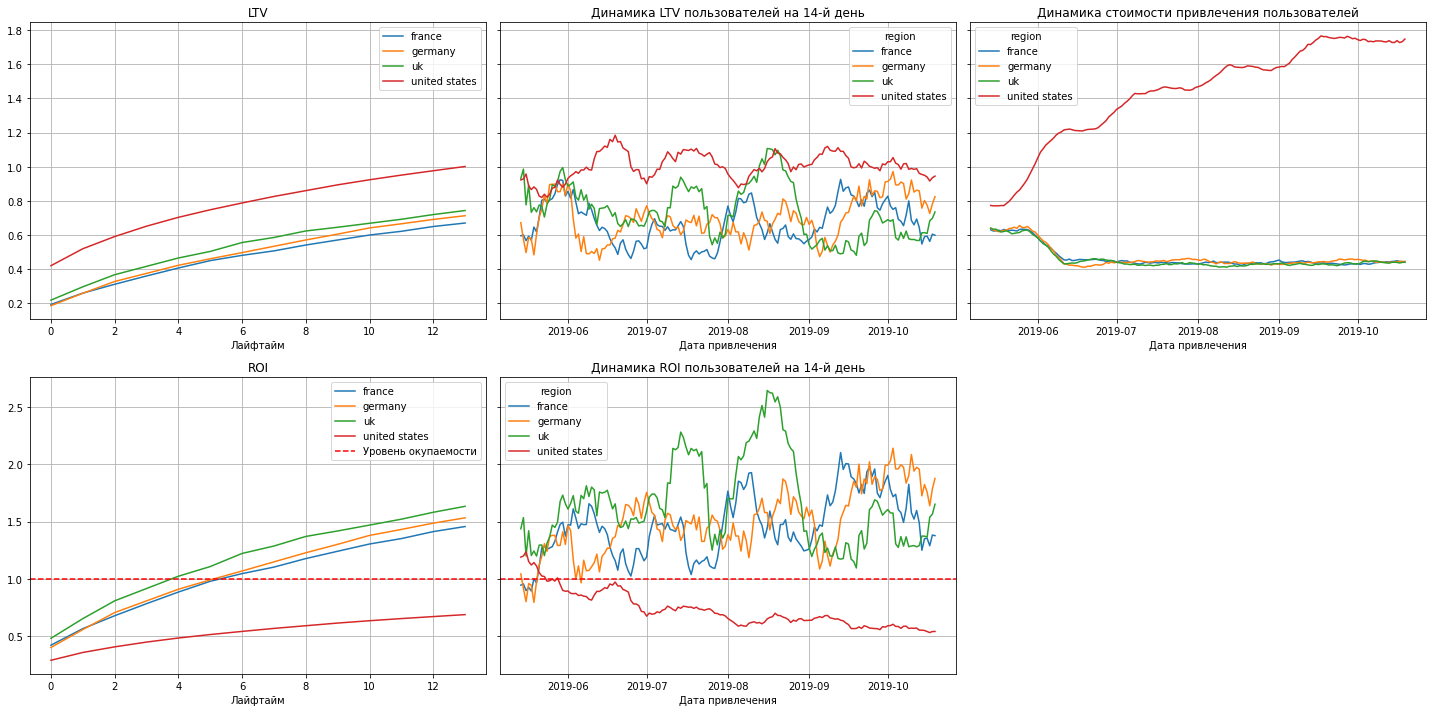

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Видно четкое разделение на два региона c отличительными тенденциями: США и Европа. Европейские показатели стабильно находятся выше уровня окупаемости, тогда как показатели ROI у США отрицательные и едва доходят до 70%. Несмотря на то, что LTV и LTV в динамике у американских пользователей выше, чем у европейских, очевидно это не компенсирует стремительно растущие затраты на привлечение американских клиентов. При этом показатель CAC для всех европейских стран упал в первой половине июня и оставался на несопоставимо низком уровне по сравнению с американскими клиентами.  

Так как у американского рынка есть очевидные проблемы с окупаемостью, разделим рекламные показатели на американские и европейские и рассмотрим их отдельно в каждом регионе.

In [ ]:
us_profiles_grouped = profiles.query('region == "united states"').groupby('channel') \
                              .agg({'acquisition_cost':'mean', 'user_id':'nunique', 'payer':'mean'}).round(2)  \
                              .rename(columns={'acquisition_cost':'cac'})  \
                              .sort_values(by='cac',ascending=False) \
                              .reset_index()
                              
display(us_profiles_grouped)

,channel,cac,user_id,payer
0,tiptop,2.80,19561,0.10
1,faceboom,1.11,29144,0.12
2,rocketsuperads,0.41,4448,0.08
3,mediatornado,0.22,4364,0.04
4,yrabbit,0.22,4312,0.04


In [ ]:
europe_profiles_grouped = profiles.query('region != "united states"').groupby('channel') \
                              .agg({'acquisition_cost':'mean', 'user_id':'nunique', 'payer':'mean'}).round(2)  \
                              .rename(columns={'acquisition_cost':'cac'})  \
                              .sort_values(by='cac',ascending=False) \
                              .reset_index()
                              
display(europe_profiles_grouped)

,channel,cac,user_id,payer
0,adnonsense,1.01,3880,0.11
1,lambdamediaads,0.72,2149,0.10
2,wahoonetbanner,0.60,8553,0.05
3,opplecreativemedia,0.25,8605,0.03
4,leapbob,0.21,8553,0.03


Согласно таблицам, рекламные каналы разделены по регионам и не пересекаются. На американском рынке используются рекламные каналы TipTop, FaceBoom, RocketSuperAds, MediaTornado и YRabbit, на европейском - AdNonSense, lambdaMediaAds, WahooNetBanner, OppleCreativeMedia и LeapBob. Так как проблема окупаемости рекламных расходов напрямую связана с привлечением американских пользователей, рассмотрим подробнее именно рекламу в США.

При разбивке профилей американских пользователей по рекламным каналам становится очевидно, что рекламные вложения в TipTop не оправдывают себя и их постоянное увеличение на протяжении всего рассматриваемого периода привело к стремительному снижению показателей окупаемости рекламной кампании в целом. Стоимость привлечения пользователей через канал TipTop в 2.5 раза превышает аналогичный показатель у второго по затратности рекламного канала FaceBoom и более чем в 3.5 раза превышает средний показатель CAC по всем каналам. При этом по количеству привлеченных пользователей и конверсии в платящих пользователей FaceBoom показывает лучшие результаты, чем TipTop.

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

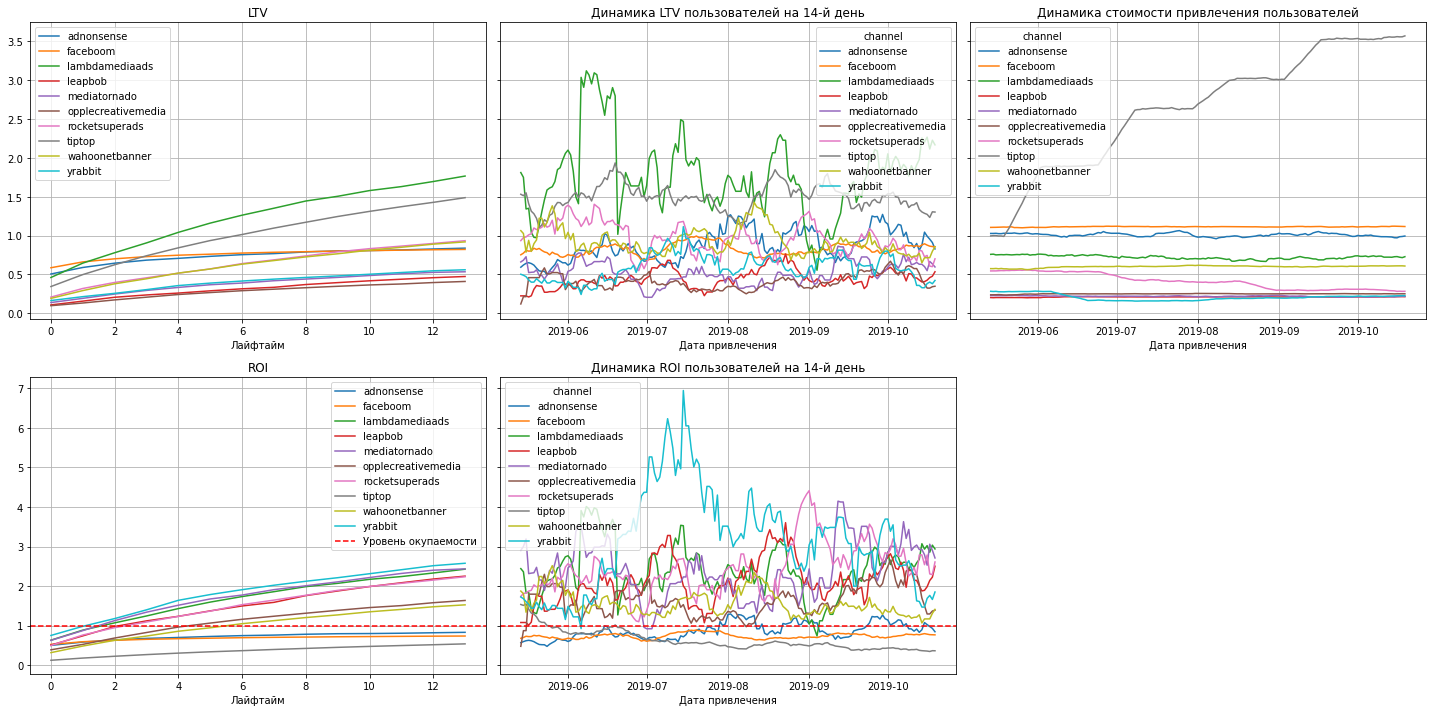

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

ROI ниже уровня окупаемости у трех рекламных каналов: TipTop, FaceBoom и AdNonSense. При этом из предыдущих расчетов мы помним, что именно у первых двух каналов были максимальные привлечения инвестиций на рекламу приложения, которые очевидно не окупились. Показатель CAC пользователей, привлеченных через TipTop, постоянно и существенно рос с середины мая, тогда как у остальных рекламных каналов показатели CAC оставались на стабильном уровне. Стоит отметить, что наивысшие показатели LTV у пользователей, привлеченных с помощью lambdaMediaAds и TipTop.

Ответим на следующие вопросы: <br>
1. Окупается ли реклама, направленная на привлечение пользователей в целом? <br>
Нет, поскольку ROI стабильно сильно ниже уровня окупаемости, а CAC стремительно растет с увеличением расходов на рекламу. <br>
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? <br>
В разбивке по устройствам положительную динамику показывают только пользователи PC, показатели Android хуже, но не настолько низкие, как у пользователей устройств Apple. При разделении пользователей по странам четко выделилась тенденция, согласно которой рекламные расходы на привлечение американских пользователей не окупаются. Из рекламных каналов ниже уровня окупаемости показатели у TipTop, FaceBoom и AdNonSense. <br>
3. Чем могут быть вызваны проблемы окупаемости? <br>
На основании проанализированных показателей можно сделать вывод о том, что значительное увеличение рекламных вложений в TipTop было неоправданным и отрицательно повлияло на окупаемость рекламных вложений в целом. Привлечение пользователей следующих трех категорий слишком дорогое и не окупается: пользователи с устройствами на платформе Apple, пользователи из США и пользователи, привлеченные с помощью TipTop. На протяжении всего анализируемого периода показатель CAC увеличивался, что позволяет сделать вывод о неправильной рекламной стратегии. При этом показатели конверсии невысокие и практически останавливаются в росте во второй половине лайфтайма, то есть привлеченные пользователи не так часто начинают пользоваться платными услугами, как это необходимо было бы для поддержания уровня окупаемости рекламы. Помимо неправильно выбранной рекламной стратегии можно предположить, что реклама адресована неподходящей целевой аудитории, низкая вовлеченность которой еще больше обесценивает повышенные рекламные вложения, что приводит к удорожению каждого последующего привлечения новых клиентов. 

### Итоговые выводы и рекомендации

#### Причины неэффективности привлечения пользователей
- Неоправданное продолжительное повышение рекламных расходов при низких показателях эффективности выбранной рекламной стратегии;
- Отсутствие гибкости в использовании рекламных каналов: изначально были выбраны рекламные каналы, расходы на которые были увеличены (TipTop и FaceBoom), и, несмотря на высокие показатели CAC привлеченных через эти каналы пользователей, стратегия по распределению расходов на рекламу не корректировалась;
- Несмотря на проблему неоправданного повышения расходов на ряд каналов, демонстрировавших свою низкую эффективность, некоторые рекламные каналы с высоким уровнем ROI и показателями конверсии и удержания платящих пользователей, в частности WahooNetBanner и RocketSuperAds, не получали дополнительного финансирования, хоть и показывали хорошие результаты;
- Причиной неокупаемости рекламных вложений в разбивке пользователей по регионам стали США. Несмотря на лучшие показатели конверсии среди всех стран, остальные анализируемые показатели американского рынка свидетельствуют о наличие явных проблем: низкий уровень удержания платящих пользователей, низкий ROI и стремительно растущий показатель CAC;
- Разительное отличие в показателях окупаемости привлекаемых американских и европейских пользователей свидетельствует о том, что в отношении американского сегмента рынка применяется неверная тактика привлечения новых клиентов. На протяжении всего рассматриваемого периода времени рекламный бюджет на 2 главных канала привлечения американских клиентов - TipTop и FaceBoom - повышался, при этом росли показатели CAC, величина которых делала окупаемость подобных рекламных вложений невозможной. Несмотря на то, что на FaceBoom расходы росли не в таких масштабах, как на TipTop, именно у FaceBoom, также как и у европейского канала привлечения пользователей AdNonSense, были самые низкие показатели удержания платящих пользователей. Таким образом, огромные показатели CAC канала TipTop, даже при довольно неплохих показателях конверсии и удержания, привели к неокупаемости рекламных вложений, так же как и значительные расходы на FaceBoom с очень низкими показателями удержания платящих пользователей были неоправданными, что и стало причиной неокупаемости рекламной кампании на американском рынке;
- На европейском рынке, несмотря на позитивные показатели ROI, также обнаружилась проблема, а именно неокупаемость вложений в канал AdNonSense. Так как финансирование этого рекламного источника было довольно умеренным, это не привело к неокупаемости европейского рынка в целом, однако низкие показатели удержания платящих пользователей и высокий показатель CAC свидетельствуют о неоправданности значительных в масштабах европейского рынка вложений в этот канал. 

#### Рекомендации для отдела маркетинга

- В соответствии со сделанными ранее выводами пересмотреть стратегию продвижения в рекламных каналах и перераспределить бюджет в пользу наиболее эффективных каналов привлечения клиентов. На американском рынке увеличение расходов на каналы TipTop и FaceBoom привели к неокупаемости вложений в целом, в связи с этим необходимо перераспределить финансирование, обратив внимание на канал RocketSuperAds с очень выгодными показателями CAC, хорошей конверсией и удержанием платящих пользователей и позитивными значениями ROI. На европейском рынке вложения в AdNonSense не окупались, в связи с чем необходимо обратить внимание на два других рекламных канала с положительными и перспективными бизнес-показателями: в первую очередь на lambdaMediaAds, затем на WahooNetBanner;
- Проанализировать возможные дополнительные причины низкого уровня удержания платящих пользователей из США. Возможно, помимо неудачной рекламной стратегии есть дополнительные негативные факторы, приводящие к тому, что платящие американские пользователи при высоком уровне конверсии в покупателей довольно быстро прекращают пользоваться приложением. Например, причиной может быть разное качество оказываемых услуг или более высокий уровень конкуренции с аналоговыми приложениями;
- Изучить возможности выхода на новые региональные рынки, оценив аналогичные приложения на этих рынках и проанализировав потенциал Procrastinate Pro+ в случае его продвижения в других странах;
- С целью повышения показателей окупаемости сделать акцент на более активном вовлечении пользователей в использование платных функций приложения, эффективнее продвигая их преимущества и целесообразность в рамках рекламных кампаний;
- Тщательно проанализировать ЦА приложения, сделав более точечный таргет именно на активных пользователей подобных приложений (например, проведя анализ аудитории конкурентов), что повысит естественный прирост интереса новых клиентов и сократит расходы на привлечение холодной аудитории;
- Попытаться снизить стоимость привлечения новых пользователей за счет размещения интеграций в сторонних приложениях, которые имеют прямое отношение к тематике Procrastinate Pro+, тем самым привлекая замотивированную целевую аудиторию, готовую активно пользоваться приложением и потенциально использовать платные услуги.